In [1]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
# Set of 70,000 images of numbers, each of 28x28 pixels = 784 features

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
type(mnist)

sklearn.utils._bunch.Bunch

In [3]:
#It's a dictionary-like object with keys:values
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# Will print all values
#mnist.values()

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [24]:
X = mnist.data
y = mnist.target

In [25]:
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [26]:
X.shape, y.shape

((70000, 784), (70000,))

'0'

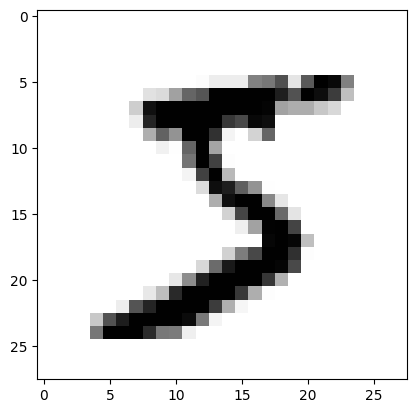

In [27]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")


plot_digit(X[0])
y[1]

In [33]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [34]:
# Train a binary classifier
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [35]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [36]:
# Import Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [37]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [38]:
sgd_clf.predict([X_train[0]])

array([ True])

In [40]:
# EVALUATING PERFORMANCE: CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

In [41]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#Accuracy (ratio of correct predictions) turns out high because the 5's are a small percentage of all digits

array([0.95035, 0.96035, 0.9604 ])

In [42]:
# EVALUATE USING CONFUSION MATRIX
from sklearn.model_selection import cross_val_predict

In [43]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# (performs k-fold cross-validation and returns collected predictions on the test folds)

In [44]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [ ]:
cross_val_predict()

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm
# row=class (non-5s or negatives, 5s or positives)
# column 1: true negatives, false positives
# column 2: false negatives, true positives
# perfect case: off-diagonal elements = 0

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
# The SGD Classifier has a decision threshold set to "0". See Geron notebook Chapter 3 and course notes to see how precision and recall depend on varying this threshold